In [5]:
import pandas as pd

df = pd.read_csv('C:/Users/Swaroop/isro project/solar_flux_data.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
train_data = df[df['Date'].dt.year<1996]
test_data = df[df['Date'].dt.year>=1996]

In [24]:
test_data['sfu']

17853    75.000000
17854    74.000000
17855    80.000000
17856    85.000000
17857    84.000000
           ...    
26981    85.983333
26982    84.433333
26983    83.583333
26984    82.733333
26985    82.733333
Name: sfu, Length: 9133, dtype: float64

In [10]:
import numpy as np
sequence = df['sfu']

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

# define input sequence
raw_seq = df['sfu']
# choose a number of time steps
n_steps = 27
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

In [27]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

train split done


In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(X, y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


843/843 [==============================] - 9s 9ms/step - loss: 2271.0439 - val_loss: 77.3587
Epoch 2/50
843/843 [==============================] - 8s 10ms/step - loss: 73.2947 - val_loss: 77.7835
Epoch 3/50
843/843 [==============================] - 8s 9ms/step - loss: 54.1536 - val_loss: 73.2354
Epoch 4/50
843/843 [==============================] - 8s 9ms/step - loss: 61.9835 - val_loss: 102.6007
Epoch 5/50
843/843 [==============================] - 8s 9ms/step - loss: 65.0210 - val_loss: 69.5172
Epoch 6/50
843/843 [==============================] - 8s 9ms/step - loss: 45.1437 - val_loss: 61.5994
Epoch 7/50
843/843 [==============================] - 8s 9ms/step - loss: 43.1301 - val_loss: 63.6944
Epoch 8/50
843/843 [==============================] - 8s 9ms/step - loss: 2223.1702 - val_loss: 143.0979
Epoch 9/50
843/843 [==============================] - 8s 9ms/step - loss: 127.6066 - val_loss: 119.1137
Epoch 10/50
843/843 [==============================] - 8s 9ms/step - loss: 108.6807 

<AxesSubplot: >

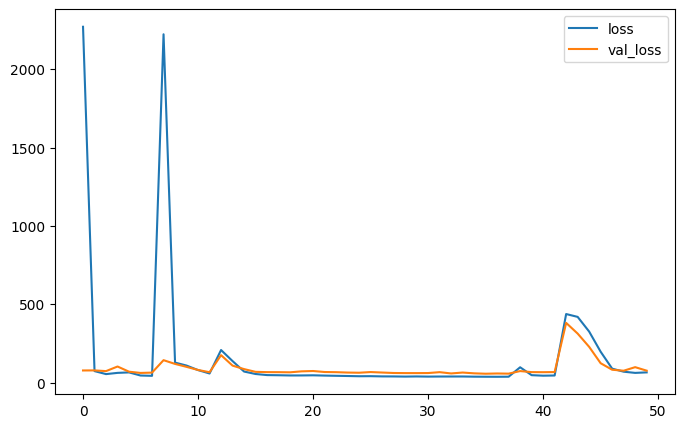

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))


In [31]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 1s 3ms/step


In [32]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.9595012633448489
RMSE:  8.725368086273086


In [18]:
model.save('singlelayerLSTM.h5')

LSTM with 64 units

In [35]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('singleLSTM64.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 8s 12ms/step - loss: 4503.5581 - val_loss: 425.3190
Epoch 2/50
558/558 [==============================] - 6s 11ms/step - loss: 435.6338 - val_loss: 252.2152
Epoch 3/50
558/558 [==============================] - 6s 11ms/step - loss: 295.8269 - val_loss: 208.0896
Epoch 4/50
558/558 [==============================] - 6s 11ms/step - loss: 258.1609 - val_loss: 192.5838
Epoch 5/50
558/558 [==============================] - 7s 12ms/step - loss: 227.2689 - val_loss: 176.0780
Epoch 6/50
558/558 [==============================] - 6s 11ms/step - loss: 182.7075 - val_loss: 132.9037
Epoch 7/50
558/558 [==============================] - 6s 11ms/step - loss: 442.1055 - val_loss: 233.8338
Epoch 8/50
558/558 [==============================] - 7s 12ms/step - loss: 258.0867 - val_loss: 215.4211
Epoch 9/50
558/558 [==============================] - 6s 11ms/step - loss: 243.1081 - val_loss: 210.2695
Epoch 10/50
558/558 [==============================] - 6s 10ms/st

<AxesSubplot: >

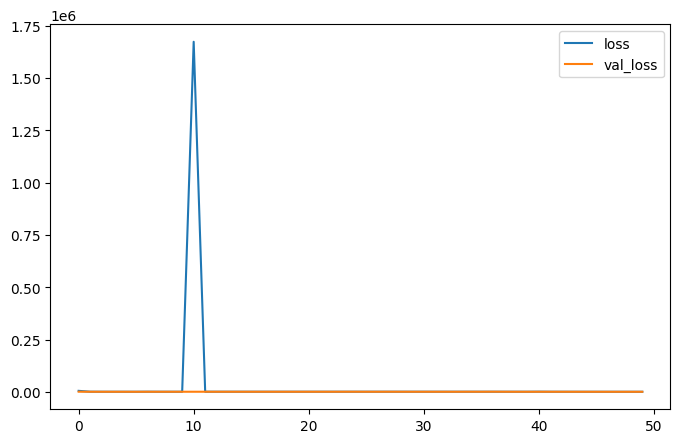

In [50]:
pd.DataFrame(history.history).plot(figsize=(8,5))


In [48]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 1s 4ms/step


In [49]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.9498129583135507
RMSE:  9.713121414944831


2 layer LSTM with 64 32 units

In [51]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu',return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('2LayerLSTM6432.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 14s 21ms/step - loss: 15805.8418 - val_loss: 450.5784
Epoch 2/50
558/558 [==============================] - 12s 21ms/step - loss: 319.1072 - val_loss: 255.3444
Epoch 3/50
558/558 [==============================] - 12s 22ms/step - loss: 196.1938 - val_loss: 262.3435
Epoch 4/50
558/558 [==============================] - 10s 18ms/step - loss: 408.4316 - val_loss: 379.1798
Epoch 5/50
558/558 [==============================] - 10s 19ms/step - loss: 434.1399 - val_loss: 351.2359
Epoch 6/50
558/558 [==============================] - 10s 19ms/step - loss: 337.5121 - val_loss: 262.4095
Epoch 7/50
558/558 [==============================] - 11s 19ms/step - loss: 714.4034 - val_loss: 402.0923
Epoch 8/50
558/558 [==============================] - 12s 21ms/step - loss: 599.0800 - val_loss: 468.7356
Epoch 9/50
558/558 [==============================] - 11s 20ms/step - loss: 586.9237 - val_loss: 396.5370
Epoch 10/50
558/558 [==============================] - 

<AxesSubplot: >

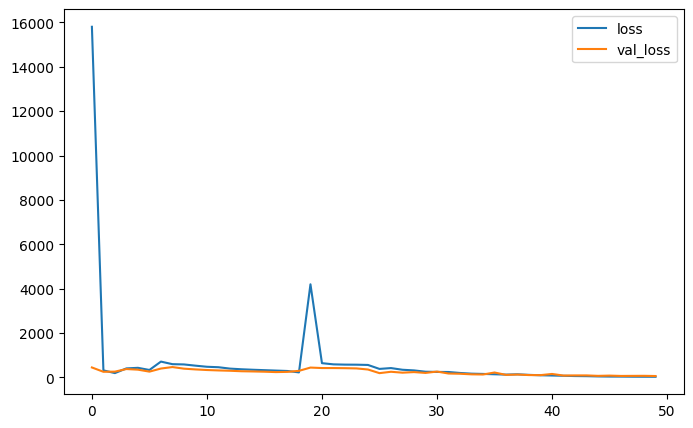

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.9498129583135507
RMSE:  9.713121414944831


2 LAYERED LSTM WITH BOTH RETURN_SEQ = True

In [57]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [71]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('2LayerLSTM6432_v2.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


322/558 [================>.............] - ETA: 5s - loss: 13928.7051

KeyboardInterrupt: 

In [64]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 2s 6ms/step


In [63]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

ValueError: Found array with dim 3. None expected <= 2.

3 Layered LSTM 

In [ ]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [72]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences= True,  input_shape=(n_steps, n_features)))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))

# Compile model with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Define checkpoint callback
checkpoint = ModelCheckpoint('3LayerLSTM643216.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit model with checkpointing
history = model.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 20s 29ms/step - loss: 5037.4058 - val_loss: 681.5106
Epoch 2/50
558/558 [==============================] - 15s 27ms/step - loss: 1514.5847 - val_loss: 682.6987
Epoch 3/50
558/558 [==============================] - 14s 26ms/step - loss: 936.0818 - val_loss: 468.7449
Epoch 4/50
558/558 [==============================] - 14s 26ms/step - loss: 626.7081 - val_loss: 387.4768
Epoch 5/50
558/558 [==============================] - 14s 26ms/step - loss: 383.7231 - val_loss: 317.8738
Epoch 6/50
558/558 [==============================] - 14s 26ms/step - loss: 386.9725 - val_loss: 274.4425
Epoch 7/50
558/558 [==============================] - 15s 26ms/step - loss: 285.8145 - val_loss: 242.0559
Epoch 8/50
558/558 [==============================] - 14s 26ms/step - loss: 240.5510 - val_loss: 210.7982
Epoch 9/50
558/558 [==============================] - 14s 26ms/step - loss: 245.4944 - val_loss: 193.7261
Epoch 10/50
558/558 [==============================] - 

<AxesSubplot: >

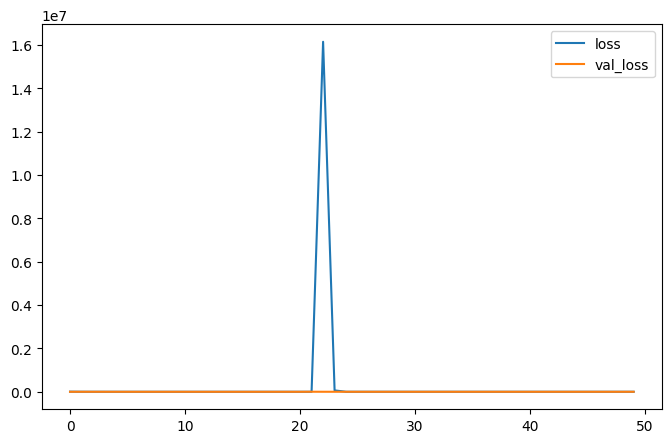

In [75]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [73]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
pred_y = model.predict(test_X)

285/285 [==============================] - 3s 8ms/step


In [74]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.7189686860114571
RMSE:  22.98478131989393


CNN LSTM MODEL

In [76]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [77]:
subsequences = 1
timesteps = train_X.shape[1]//subsequences
train_X = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', train_X.shape)

Train set shape (17826, 1, 27, 1)


In [83]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM50.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50
558/558 [==============================] - 5s 6ms/step - loss: 487.2914 - val_loss: 199.7863
Epoch 2/50
558/558 [==============================] - 3s 5ms/step - loss: 157.0451 - val_loss: 164.0298
Epoch 3/50
558/558 [==============================] - 3s 5ms/step - loss: 123.7813 - val_loss: 169.7198
Epoch 4/50
558/558 [==============================] - 2s 4ms/step - loss: 114.9194 - val_loss: 171.2453
Epoch 5/50
558/558 [==============================] - 2s 4ms/step - loss: 110.6642 - val_loss: 178.3033
Epoch 6/50
558/558 [==============================] - 2s 4ms/step - loss: 105.5520 - val_loss: 179.7160
Epoch 7/50
558/558 [==============================] - 2s 4ms/step - loss: 108.0467 - val_loss: 176.8785
Epoch 8/50
558/558 [==============================] - 3s 5ms/step - loss: 103.4055 - val_loss: 183.7424
Epoch 9/50
558/558 [==============================] - 2s 4ms/step - loss: 101.6039 - val_loss: 242.0047
Epoch 10/50
558/558 [==============================] - 3s 5ms/st

In [86]:
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))

In [89]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

285/285 [==============================] - 1s 2ms/step


In [90]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8876662352494111
RMSE:  14.531758647404613


2 cnn lstm

In [91]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [92]:
subsequences = 1
timesteps = train_X.shape[1]//subsequences
train_X = train_X.reshape((train_X.shape[0], subsequences, timesteps, 1))
test_X = test_X.reshape((test_X.shape[0], subsequences, timesteps, 1))
print('Train set shape', train_X.shape)

Train set shape (17826, 1, 27, 1)


In [106]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=4,  activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=4, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM50.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 4s 5ms/step - loss: 913.4976 - val_loss: 347.9606
Epoch 2/50
558/558 [==============================] - 2s 4ms/step - loss: 324.7936 - val_loss: 247.4067
Epoch 3/50
558/558 [==============================] - 2s 4ms/step - loss: 250.7277 - val_loss: 240.4401
Epoch 4/50
558/558 [==============================] - 2s 4ms/step - loss: 215.2297 - val_loss: 239.6161
Epoch 5/50
558/558 [==============================] - 2s 4ms/step - loss: 206.4836 - val_loss: 222.4698
Epoch 6/50
558/558 [==============================] - 2s 4ms/step - loss: 208.6369 - val_loss: 247.5169
Epoch 7/50
558/558 [==============================] - 2s 4ms/step - loss: 199.2776 - val_loss: 367.9029
Epoch 8/50
558/558 [==============================] - 2s 4ms/step - loss: 198.8256 - val_loss: 245.8838
Epoch 9/50
558/558 [==============================] - 2s 4ms/step - loss: 182.8514 - val_loss: 250.3825
Epoch 10/50
558/558 [==============================] - 2s 4ms/step - loss: 

In [107]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

285/285 [==============================] - 1s 2ms/step


In [108]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.8653090218222668
RMSE:  15.912274885888893


2CNN2LSTM model 

In [ ]:
train_X, train_y = split_sequence(train_data['sfu'], 27)
# print("train split done")
test_X, test_y = split_sequence(np.array(test_data['sfu']), 27)

In [116]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Flatten, Conv1D, TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=16, kernel_size=14,  activation='relu'), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=4, activation='relu')))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(64, activation='relu', return_sequences= True))
model_cnn_lstm.add(LSTM(32, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

optimizer = Adam(lr=0.001)
model_cnn_lstm.compile(optimizer=optimizer, loss='mse')
# Define checkpoint callback
checkpoint = ModelCheckpoint('CNNLSTM6432.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

history = model_cnn_lstm.fit(train_X, train_y, epochs=50, verbose=1, validation_data = (test_X, test_y), callbacks=[checkpoint])

Epoch 1/50


c:\Users\Swaroop\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


558/558 [==============================] - 5s 4ms/step - loss: 1006.8510 - val_loss: 188.0398
Epoch 2/50
558/558 [==============================] - 2s 4ms/step - loss: 140.0676 - val_loss: 168.9059
Epoch 3/50
558/558 [==============================] - 2s 4ms/step - loss: 102.4285 - val_loss: 138.0965
Epoch 4/50
558/558 [==============================] - 2s 4ms/step - loss: 85.6422 - val_loss: 142.0436
Epoch 5/50
558/558 [==============================] - 2s 4ms/step - loss: 80.8391 - val_loss: 145.2811
Epoch 6/50
558/558 [==============================] - 2s 4ms/step - loss: 68.6636 - val_loss: 130.9130
Epoch 7/50
558/558 [==============================] - 2s 4ms/step - loss: 66.2465 - val_loss: 136.9543
Epoch 8/50
558/558 [==============================] - 2s 4ms/step - loss: 62.9630 - val_loss: 134.9906
Epoch 9/50
558/558 [==============================] - 2s 4ms/step - loss: 59.6860 - val_loss: 135.2012
Epoch 10/50
558/558 [==============================] - 2s 4ms/step - loss: 56.89

In [117]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features)) this is already done above
pred_y = model_cnn_lstm.predict(test_X)

285/285 [==============================] - 1s 1ms/step


In [118]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have your true values in 'y_true' and predicted values in 'y_pred'
r2 = r2_score(test_y, pred_y)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))


print("R2 score:", r2)
print("RMSE: ", rmse)

R2 score: 0.9246940528516168
RMSE:  11.898101151860521
